# Divination Hackathon Prediction

Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [517]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import numpy as np

%matplotlib inline

## Loading and Reviewing the Data

In [518]:
df = pd.read_csv("./hackathon-data.csv")

In [519]:
df.shape

(7078, 47)

In [520]:
# df.head(5)

In [521]:
# df.tail(5)

### Definition of features
From the metadata on the data source we have the following definition of the data columns.

Joined Proctor:
The date the user is registered on Andela Proctor platform.

Stage:
The stage the user got to. Bootcamp indicates entry to Bootcamp and Offer indicates offer into fellowship.

Bootcamp:
Whether the user made it to Bootcamp or not.

Score:
The score of the user on Proctor.

% Score:
The percentage score, which is score / 200.

% Completed:
Percentage of the curriculum that was completed.


Ma-Sb (Correct | Wrong | Tries):
M - Module
S - Section
a - Module number
b - Section number

Section 1 - Quizzes: 
The Correct/Wrong columns indicates the number the user got correctly and got wrongly respectively. Tries indicates number of attempts by the user to solve the quiz.

Section 2 - Labs:
Tries indicates the number of the times the user attempted the lab.
Labs only have number of tries unlike quizzes.

Note: 0 tries indicates the user do not attempt the quiz/lab.

Examples:
M1-S1 Correct - number of questions the user got correctly in Module 1 Section 1.
M2-S1 Wrong - number of questions the user got wrong in Module 2 Section 1.
M1-S2 Tries - number of attempts by the user to answer the questions in Module 1 Section 2.



## Check for null values

In [522]:
df.isnull().values.any()

False

### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [523]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


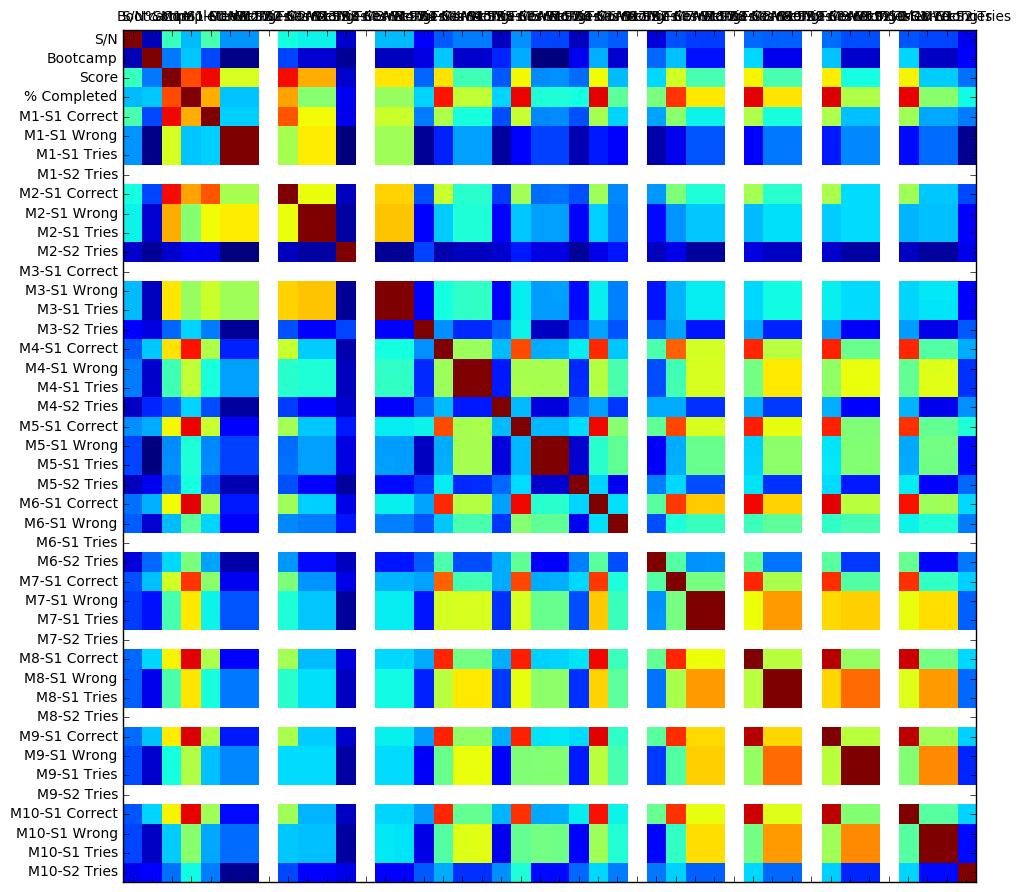

In [524]:
plot_corr(df)

In [525]:
df.corr()

,S/N,Bootcamp,Score,% Completed,M1-S1 Correct,M1-S1 Wrong,M1-S1 Tries,M1-S2 Tries,M2-S1 Correct,M2-S1 Wrong,...,M8-S1 Tries,M8-S2 Tries,M9-S1 Correct,M9-S1 Wrong,M9-S1 Tries,M9-S2 Tries,M10-S1 Correct,M10-S1 Wrong,M10-S1 Tries,M10-S2 Tries
S/N,1.000000,0.050296,0.418005,0.311434,0.439836,0.270719,0.270719,NaN,0.375611,0.365756,...,0.219062,NaN,0.232751,0.202679,0.202679,NaN,0.209650,0.194885,0.194881,0.099598
Bootcamp,0.050296,1.000000,0.243794,0.322563,0.198934,0.011089,0.011089,NaN,0.192152,0.072944,...,0.097173,NaN,0.317111,0.067467,0.067467,NaN,0.332742,0.059618,0.059602,0.116299
Score,0.418005,0.243794,1.000000,0.828956,0.901902,0.610764,0.610764,NaN,0.897635,0.722747,...,0.440783,NaN,0.658190,0.376155,0.376155,NaN,0.651325,0.326401,0.326623,0.235495
% Completed,0.311434,0.322563,0.828956,1.000000,0.725359,0.317825,0.317825,NaN,0.737040,0.514597,...,0.665213,NaN,0.918891,0.565812,0.565812,NaN,0.907993,0.516088,0.516332,0.372292
M1-S1 Correct,0.439836,0.198934,0.901902,0.725359,1.000000,0.328963,0.328963,NaN,0.820096,0.641107,...,0.379790,NaN,0.561836,0.313071,0.313071,NaN,0.543097,0.290187,0.290374,0.247924
M1-S1 Wrong,0.270719,0.011089,0.610764,0.317825,0.328963,1.000000,1.000000,NaN,0.552244,0.659561,...,0.242600,NaN,0.149616,0.259709,0.259709,NaN,0.133721,0.232083,0.232072,0.017480
M1-S1 Tries,0.270719,0.011089,0.610764,0.317825,0.328963,1.000000,1.000000,NaN,0.552244,0.659561,...,0.242600,NaN,0.149616,0.259709,0.259709,NaN,0.133721,0.232083,0.232072,0.017480
M1-S2 Tries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2-S1 Correct,0.375611,0.192152,0.897635,0.737040,0.820096,0.552244,0.552244,NaN,1.000000,0.634790,...,0.399580,NaN,0.558557,0.343637,0.343637,NaN,0.545631,0.320975,0.321214,0.198558
M2-S1 Wrong,0.365756,0.072944,0.722747,0.514597,0.641107,0.659561,0.659561,NaN,0.634790,1.000000,...,0.347342,NaN,0.327916,0.343295,0.343295,NaN,0.301581,0.313484,0.313460,0.116317


In [526]:
# df.head(5)

Dropping the highly correlated columns.

In [527]:
del df['M1-S1 Wrong']
del df['M2-S1 Wrong']
del df['M3-S1 Wrong']
del df['M4-S1 Wrong']
del df['M5-S1 Wrong']
del df['M6-S1 Wrong']
del df['M7-S1 Wrong']
del df['M8-S1 Wrong']
del df['M9-S1 Wrong']
del df['M10-S1 Wrong']
del df['M1-S1 Correct']
del df['M2-S1 Correct']
del df['M3-S1 Correct'] # Zero Data
del df['M4-S1 Correct']
del df['M5-S1 Correct']
del df['M6-S1 Correct']
del df['M7-S1 Correct']
del df['M8-S1 Correct']
del df['M9-S1 Correct']
del df['M10-S1 Correct']
# del df['M1-S1 Tries']
# del df['M2-S1 Tries']
# del df['M3-S1 Tries']
# del df['M4-S1 Tries']
# del df['M5-S1 Tries']
del df['M6-S1 Tries'] # Zero Data
# del df['M7-S1 Tries']
# del df['M8-S1 Tries']
# del df['M9-S1 Tries']
# del df['M10-S1 Tries']
del df['M1-S2 Tries'] # Zero Data
# del df['M2-S2 Tries']
# del df['M3-S2 Tries']
# del df['M4-S2 Tries']
# del df['M5-S2 Tries']
# del df['M6-S2 Tries']
del df['M7-S2 Tries'] # Zero Data
del df['M8-S2 Tries'] # Zero Data
del df['M9-S2 Tries'] # Zero Data
# del df['M10-S2 Tries']
del df['Score']
del df['% Completed']
del df['Joined Proctor on']
del df['S/N']
del df['Stage']

In [528]:
# df.head(5)

Check for additional correlations

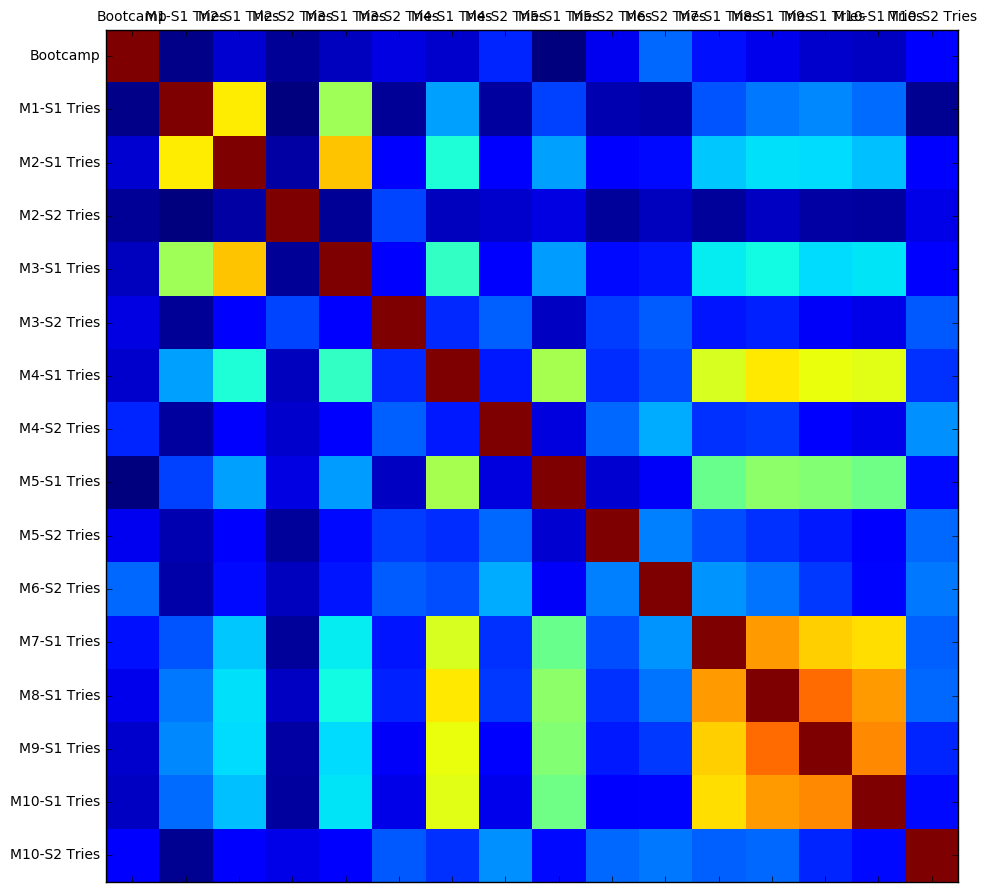

In [529]:
plot_corr(df)

Number of correlated columns highly reduced. (Perhaps remove more? Consider)

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [530]:
df.head(5)

,Bootcamp,% Score,M1-S1 Tries,M2-S1 Tries,M2-S2 Tries,M3-S1 Tries,M3-S2 Tries,M4-S1 Tries,M4-S2 Tries,M5-S1 Tries,M5-S2 Tries,M6-S2 Tries,M7-S1 Tries,M8-S1 Tries,M9-S1 Tries,M10-S1 Tries,M10-S2 Tries
0,False,56.50%,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0
1,False,52.00%,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,56.50%,5,7,0,6,1,10,1,3,1,1,4,4,10,30,1
3,False,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,False,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Change boolean to integer, True=1, False=0

Change Stage to integer, 'n/a'=0, 'Plum.io'=1, 'Andela Proctor'=2, 'Application Review'=3, 'Unqualified Candidates'=4, 'Admissions Committee'=5, 'Face to Face'=6, 'Bootcamp Scheduling'=7, 'Bootcamp Week 1'=8, 'Cut from Bootcamp Week 1'=8, 'Dropped out of Bootcamp'=9, 'Boot Camp Week 2'=10, 'Pre- Fellowship'=11 , 'Offer'=12

Remove irrelevant columns 'Joined Proctor on' and 'S/N'

Remove % sign from '% Score' column

In [531]:
bootcamp_map = {True : 1, False : 0}
df['Bootcamp'] = df['Bootcamp'].map(bootcamp_map)

# stage_map = { 
#     'n/a': 0, 'Plum.io': 0, 'Andela Proctor': 0, 'Application Review': 0, 'Unqualified Candidates': 0, 
#     'Admissions Committee': 0, 'Face to Face': 0, 'Bootcamp Scheduling': 0, 'Bootcamp Week 1': 0, 
#     'Cut from Bootcamp Week 1': 0, 'Dropped out of Bootcamp': 0, 'Boot Camp Week 2': 0, 'Pre- Fellowship': 0, 
#     'Offer': 1
# }
# df['Stage'] = df['Stage'].map(stage_map)


def cut_it(x):
    return float(x[:-1])
df['% Score'] = df['% Score'].map(cut_it)

Verify that all data is now numeric

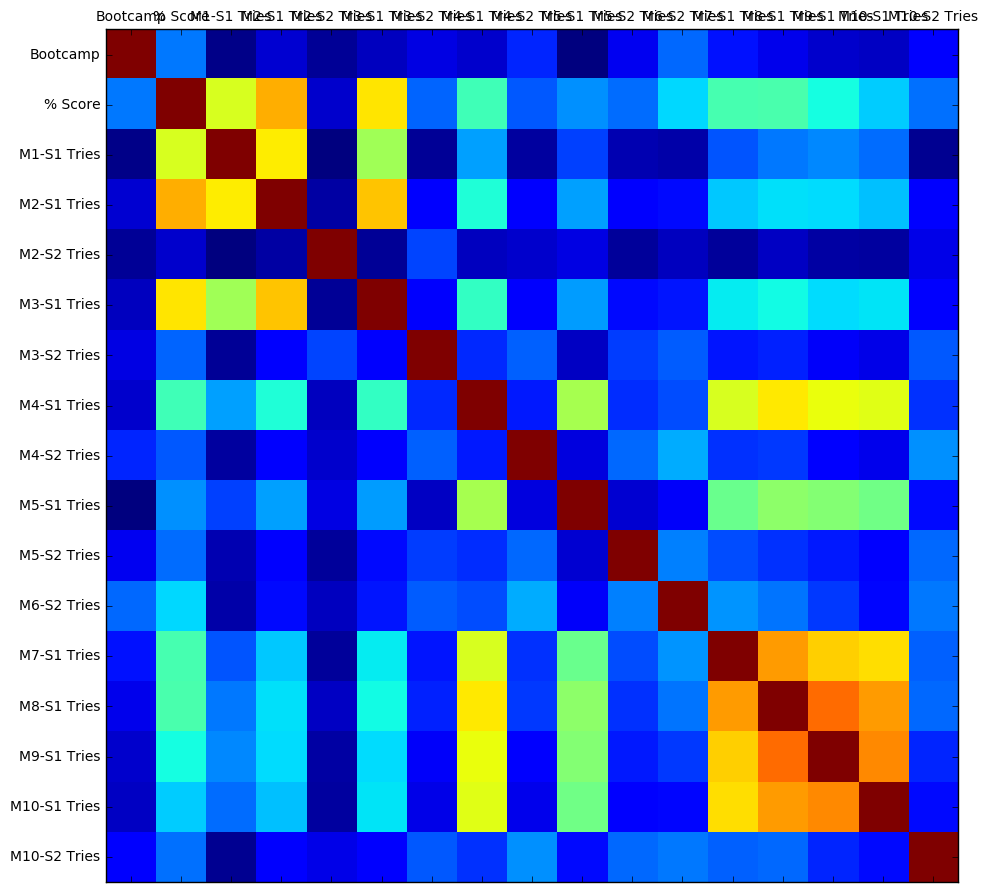

In [532]:
plot_corr(df)

### Check for null values

In [533]:
df.isnull().values.any()

False

No obvious null values.

### Check class distribution 

Rare events are hard to predict

In [534]:
num_applied = len(df)
num_accepted = len(df.loc[df['Bootcamp'] == 1])
num_not_accepted = len(df.loc[df['Bootcamp']== 0])
print("Number of Accepted Applicants:  {0} ({1:2.2f}%)".format(num_accepted, (num_accepted/num_applied) * 100))
print("Number of Rejected Applicants: {0} ({1:2.2f}%)".format(num_not_accepted, (num_not_accepted/num_applied) * 100))

Number of Accepted Applicants:  125 (1.77%)
Number of Rejected Applicants: 6953 (98.23%)


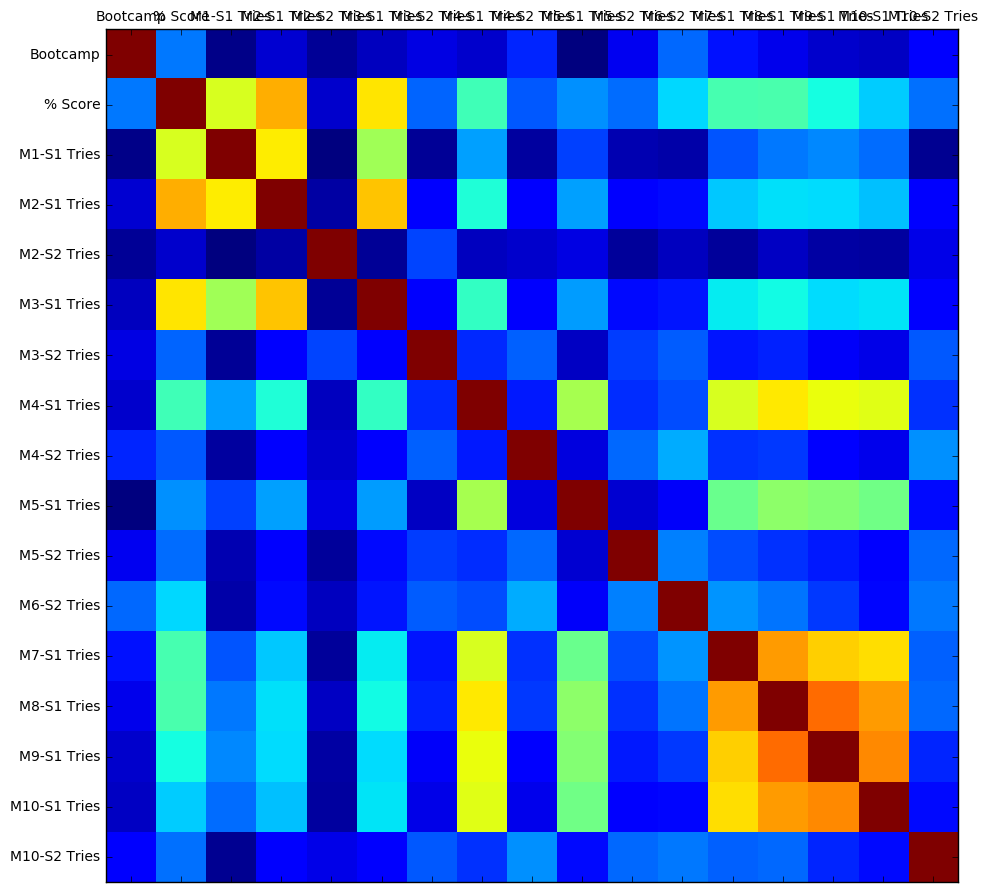

In [535]:
plot_corr(df)

## Save pre-processed dataframe for later use

In [536]:
df.to_pickle("./hackathon-data-processed.p")

### Spliting the data 

70% for training, 30% for testing

In [540]:
np.asarray(df.corr().columns)

array(['Bootcamp', '% Score', 'M1-S1 Tries', 'M2-S1 Tries', 'M2-S2 Tries',
       'M3-S1 Tries', 'M3-S2 Tries', 'M4-S1 Tries', 'M4-S2 Tries',
       'M5-S1 Tries', 'M5-S2 Tries', 'M6-S2 Tries', 'M7-S1 Tries',
       'M8-S1 Tries', 'M9-S1 Tries', 'M10-S1 Tries', 'M10-S2 Tries'], dtype=object)

In [541]:
from sklearn.model_selection import train_test_split

feature_col_names = ['% Score', 'M1-S1 Tries', 'M2-S1 Tries', 'M2-S2 Tries',
       'M3-S1 Tries', 'M3-S2 Tries', 'M4-S1 Tries', 'M4-S2 Tries',
       'M5-S1 Tries', 'M5-S2 Tries', 'M6-S2 Tries', 'M7-S1 Tries',
       'M8-S1 Tries', 'M9-S1 Tries', 'M10-S1 Tries', 'M10-S2 Tries']
predicted_class_names = ['Bootcamp']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [542]:
# Check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.99% in training set
30.01% in test set


In [543]:
# Verify predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Bootcamp'] == 1]), (len(df.loc[df['Bootcamp'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Bootcamp'] == 0]), (len(df.loc[df['Bootcamp'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 125 (1.77%)
Original False : 6953 (98.23%)

Training True  : 92 (1.86%)
Training False : 4862 (98.14%)

Test True      : 33 (1.55%)
Test False     : 2091 (98.45%)


### Decision Tree Algorithm

In [544]:
from sklearn import tree
# import random
# num = int(random.random() * 100)
# print(num)
model = tree.DecisionTreeClassifier(criterion='entropy', random_state = 42) # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  

# Train the model using the training sets and check score
model.fit(X_train, y_train.ravel())
model.score(X_train, y_train)

#Predict Output
predict_train= model.predict(X_train)
predicted= model.predict(X_test)
metrics.confusion_matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted, labels=[1,0]))
print()
print("Accuracy - Training Sample: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy - Test Sample: {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()
print("Classification Report - Test Sample")
print(metrics.classification_report(y_test, predicted, labels=[1,0]))

Confusion Matrix
[[  13   20]
 [  30 2061]]

Accuracy - Training Sample: 0.9992

Accuracy - Test Sample: 0.9765

Classification Report - Test Sample
             precision    recall  f1-score   support

          1       0.30      0.39      0.34        33
          0       0.99      0.99      0.99      2091

avg / total       0.98      0.98      0.98      2124



### Naive Bayes Algorithm

In [545]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
model = GaussianNB()

model.fit(X_train, y_train.ravel())

# predict values using the data
predict_train = model.predict(X_train)
predicted = model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy(Training): {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy(Test Data): {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted, labels=[1,0]))
print()
print("Accuracy - Training Sample: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy - Test Sample: {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()
print("Classification Report - Test Sample")
print(metrics.classification_report(y_test, predicted, labels=[1,0]))

Accuracy(Training): 0.9338

Accuracy(Test Data): 0.9388

Confusion Matrix
[[   9   24]
 [ 106 1985]]

Accuracy - Training Sample: 0.9338

Accuracy - Test Sample: 0.9388

Classification Report - Test Sample
             precision    recall  f1-score   support

          1       0.08      0.27      0.12        33
          0       0.99      0.95      0.97      2091

avg / total       0.97      0.94      0.96      2124



### KNN Algorithm

In [546]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNeighbors classifier object model 
model = KNeighborsClassifier(n_neighbors=6) # default value for n_neighbors is 5
# Train the model using the training sets and check score
model.fit(X_train, y_train.ravel())

# predict values using the data
predict_train = model.predict(X_train)
predicted = model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy(Training): {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy(Test Data): {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted, labels=[1,0]))
print()
print("Accuracy - Training Sample: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy - Test Sample: {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()
print("Classification Report - Test Sample")
print(metrics.classification_report(y_test, predicted, labels=[1,0]))

Accuracy(Training): 0.9816

Accuracy(Test Data): 0.9835

Confusion Matrix
[[   1   32]
 [   3 2088]]

Accuracy - Training Sample: 0.9816

Accuracy - Test Sample: 0.9835

Classification Report - Test Sample
             precision    recall  f1-score   support

          1       0.25      0.03      0.05        33
          0       0.98      1.00      0.99      2091

avg / total       0.97      0.98      0.98      2124



### Random Forest Algorithm

In [580]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest object
# import random
# num = int(random.random() * 100)
# print(num)
model= RandomForestClassifier(n_estimators = 300, criterion='entropy', n_jobs = -1, random_state = 42, max_features=None)
# Train the model using the training sets and check score
model.fit(X_train, y_train.ravel())

# predict values using the data
predict_train = model.predict(X_train)
predicted = model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy(Training): {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy(Test Data): {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted, labels=[1,0]))
print()
print("Accuracy - Training Sample: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
print()
print("Accuracy - Test Sample: {0:.4f}".format(metrics.accuracy_score(y_test, predicted)))
print()
print("Classification Report - Test Sample")
print(metrics.classification_report(y_test, predicted, labels=[1,0]))

Accuracy(Training): 0.9992

Accuracy(Test Data): 0.9854

Confusion Matrix
[[   3   30]
 [   1 2090]]

Accuracy - Training Sample: 0.9992

Accuracy - Test Sample: 0.9854

Classification Report - Test Sample
             precision    recall  f1-score   support

          1       0.75      0.09      0.16        33
          0       0.99      1.00      0.99      2091

avg / total       0.98      0.99      0.98      2124



In [548]:
df.shape

(7078, 17)